<a href="https://colab.research.google.com/github/Arnav613Gupta/ChattingApp/blob/main/Deep_Learning_(Dog_vs_cat_classification)_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

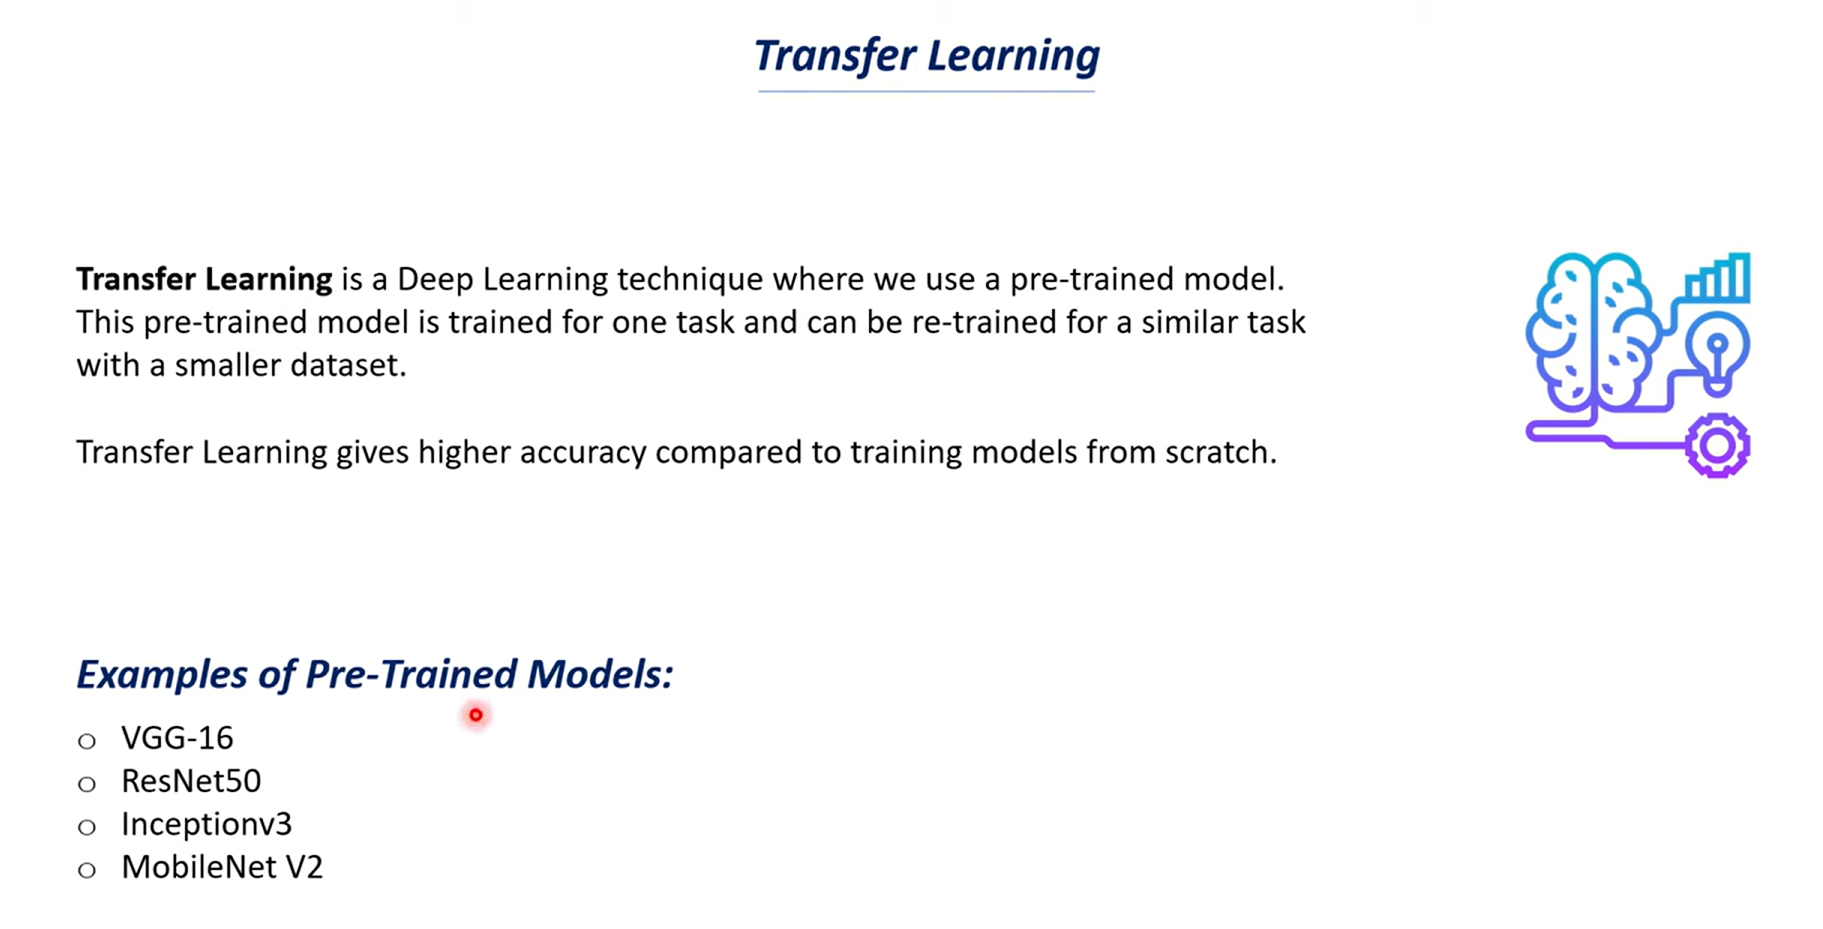

In [58]:
from google.colab import files
uploaded = files.upload()
#Move to the folder
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ &&chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [59]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [60]:
!ls


dogs-vs-cats.zip  image_resized  sampleSubmission.csv  train
drive		  sample_data	 test1.zip	       train.zip


In [61]:
#extracting files
from zipfile import ZipFile
dataset = "/content/dogs-vs-cats.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [62]:
#extracting train files
from zipfile import ZipFile
dataset = "/content/train.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [63]:
import os
#counting files
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print("No of Images",file_count)

No of Images 25000


In [64]:
#Printing name of Images
file_names = os.listdir("/content/train")
print(file_names)

['cat.1938.jpg', 'cat.8951.jpg', 'dog.1103.jpg', 'cat.4627.jpg', 'dog.9284.jpg', 'dog.3865.jpg', 'cat.11845.jpg', 'cat.6282.jpg', 'dog.11864.jpg', 'cat.3404.jpg', 'dog.8195.jpg', 'dog.8295.jpg', 'dog.8383.jpg', 'cat.4262.jpg', 'dog.6367.jpg', 'dog.1663.jpg', 'cat.3386.jpg', 'cat.4552.jpg', 'dog.10008.jpg', 'dog.3641.jpg', 'cat.11900.jpg', 'dog.1565.jpg', 'dog.5256.jpg', 'dog.9804.jpg', 'cat.548.jpg', 'cat.7772.jpg', 'dog.3927.jpg', 'cat.10274.jpg', 'cat.4730.jpg', 'dog.5730.jpg', 'dog.2311.jpg', 'cat.4216.jpg', 'cat.9231.jpg', 'dog.5606.jpg', 'dog.5416.jpg', 'cat.11899.jpg', 'dog.4434.jpg', 'dog.12076.jpg', 'cat.8761.jpg', 'cat.10592.jpg', 'cat.6673.jpg', 'dog.6485.jpg', 'dog.4610.jpg', 'cat.2272.jpg', 'cat.3697.jpg', 'dog.5386.jpg', 'dog.10516.jpg', 'cat.9482.jpg', 'dog.11153.jpg', 'cat.10052.jpg', 'cat.7780.jpg', 'cat.9435.jpg', 'dog.4854.jpg', 'dog.10760.jpg', 'dog.5648.jpg', 'cat.4339.jpg', 'cat.11888.jpg', 'cat.4689.jpg', 'cat.4546.jpg', 'cat.3882.jpg', 'cat.5891.jpg', 'cat.8260.j

In [65]:
#importing dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


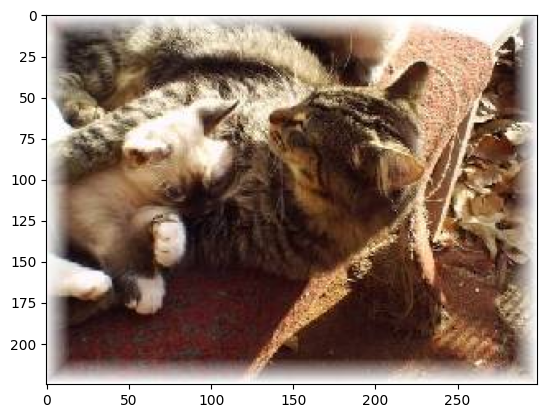

In [66]:
#display image
img = mpimg.imread("/content/train/cat.1938.jpg")
plt.imshow(img)

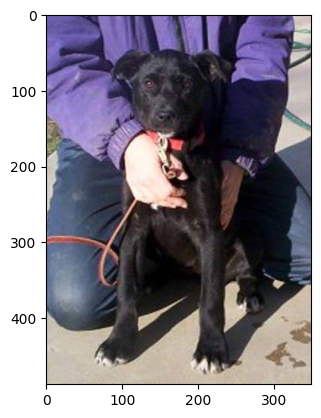

In [67]:
img = mpimg.imread("/content/train/dog.3865.jpg")
plt.imshow(img)

In [68]:
file_names = os.listdir("/content/train/")

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == "dog":
    dog_count +=1
  else:
    cat_count +=1

print("No of Dogs",dog_count)
print("No of Cats",cat_count)

No of Dogs 12500
No of Cats 12500


Resizing all images


In [71]:
# creating directory
os.mkdir("/content/image_resized/")

FileExistsError: [Errno 17] File exists: '/content/image_resized/'

In [72]:
original_folder = "/content/train/"
resized_folder = "/content/image_resized/"

for i in range(2000):
  filename  = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  new_img_path = resized_folder + filename
  img.save(new_img_path)



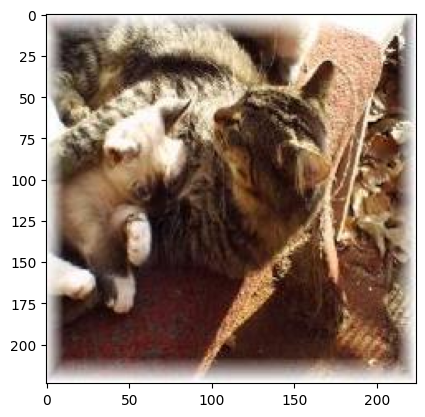

In [73]:
#display resized image
img = mpimg.imread("/content/image_resized/cat.1938.jpg")
plt.imshow(img)

**Creating Labels**

cats -> 0

dogs -> 1

In [75]:
#creating a for loop to assign labels
file_name = os.listdir("/content/image_resized/")

labels = []
for i in range(2000):
  filename = file_name[i]
  name = filename[0:3]

  if name == "cat":
    labels.append(0)
  else:
    labels.append(1)


In [76]:
print(file_name[0:5])
print(len(file_name))

['cat.1938.jpg', 'cat.8951.jpg', 'dog.1103.jpg', 'cat.4627.jpg', 'dog.9284.jpg']
2000


In [77]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 1]
2000


In [78]:
#counting unique
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

[0 1] [1028  972]


Converting all the resized image to numpy array

In [79]:
import cv2
import glob

In [80]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])


print(dog_cat_images)

[[[[253 255 254]
   [250 253 251]
   [249 251 252]
   ...
   [249 252 250]
   [255 254 253]
   [255 255 254]]

  [[246 248 248]
   [241 243 243]
   [239 241 242]
   ...
   [236 239 237]
   [243 241 240]
   [252 250 249]]

  [[240 242 243]
   [233 235 236]
   [227 229 230]
   ...
   [220 222 222]
   [232 230 230]
   [249 247 247]]

  ...

  [[243 236 243]
   [234 227 234]
   [229 222 229]
   ...
   [231 231 237]
   [243 241 247]
   [252 250 255]]

  [[250 243 250]
   [245 238 245]
   [244 237 244]
   ...
   [243 243 249]
   [248 246 252]
   [251 249 255]]

  [[255 251 255]
   [255 248 255]
   [255 249 255]
   ...
   [252 252 255]
   [252 250 255]
   [251 249 255]]]


 [[[ 10   4 217]
   [ 10   4 217]
   [ 11   4 219]
   ...
   [  2   4 192]
   [  2   4 192]
   [  2   4 192]]

  [[  8   2 215]
   [  8   2 215]
   [  9   2 217]
   ...
   [  1   3 191]
   [  1   3 191]
   [  1   3 191]]

  [[  6   0 213]
   [  6   0 213]
   [  6   0 214]
   ...
   [  0   2 190]
   [  0   2 190]
   [  0   2

In [82]:
type(dog_cat_images)

numpy.ndarray

In [83]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [84]:
X = dog_cat_images
Y = np.asarray(labels)

#Train Test Split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [85]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255


print(X_train_scaled)

[[[[0.43921569 0.42745098 0.52941176]
   [0.36862745 0.35686275 0.45882353]
   [0.33333333 0.32156863 0.41960784]
   ...
   [0.25098039 0.25882353 0.29019608]
   [0.30196078 0.30980392 0.34117647]
   [0.38039216 0.38823529 0.41960784]]

  [[0.25490196 0.24313725 0.34509804]
   [0.27058824 0.25882353 0.36078431]
   [0.35294118 0.34117647 0.43921569]
   ...
   [0.29803922 0.30588235 0.3372549 ]
   [0.30980392 0.31372549 0.35294118]
   [0.30588235 0.31372549 0.34509804]]

  [[0.27058824 0.25882353 0.35686275]
   [0.29019608 0.27843137 0.37647059]
   [0.36470588 0.35294118 0.45098039]
   ...
   [0.39215686 0.39607843 0.43529412]
   [0.38823529 0.38823529 0.43529412]
   [0.3254902  0.32941176 0.36862745]]

  ...

  [[0.48235294 0.48235294 0.55294118]
   [0.36862745 0.36862745 0.43921569]
   [0.31764706 0.3254902  0.39607843]
   ...
   [0.2627451  0.32156863 0.39607843]
   [0.38039216 0.43921569 0.51372549]
   [0.47058824 0.52941176 0.60392157]]

  [[0.41176471 0.41176471 0.48235294]
   [0.2

**Building Neural Network**

In [86]:
import tensorflow as tf
import tensorflow_hub as hub


In [87]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)




In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    tf.keras.layers.Lambda(lambda x: hub.KerasLayer(mobilenet_model, trainable=False)(x)),
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["acc"]

)

In [94]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - acc: 0.8163 - loss: 0.3510
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - acc: 0.9807 - loss: 0.0611
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - acc: 0.9911 - loss: 0.0369
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - acc: 0.9907 - loss: 0.0357
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - acc: 0.9930 - loss: 0.0312


In [95]:
score, acc = model.evaluate(X_train_scaled, Y_train)
print("Test score = , ",score)
print("Test Accuracy = ,",acc)

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - acc: 0.9932 - loss: 0.0261
Test score = ,  0.020508671179413795
Test Accuracy = , 0.9956250190734863


Path of the image to be predicted: /content/images.webp


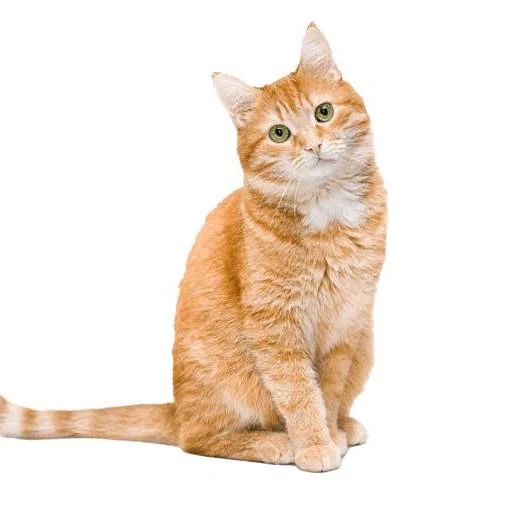

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9981314e-01 1.8684007e-04]]
0
The image represents a Cat


In [96]:
# Predictive System


input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')